In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

Data_Cuaca_Gorontalo_2017_wb = gc.open_by_key('1tjCGlITqxd-4UhEEotviQoVcMWYveJr7kFsov911rRc')
Data_Cuaca_Gorontalo_2017_ws = Data_Cuaca_Gorontalo_2017_wb.worksheet('Daily Avarage')

# get_all_values gives a list of rows.
rows = Data_Cuaca_Gorontalo_2017_ws.get_all_values()

# Convert to a DataFrame and render.
import pandas as pd
Data_Cuaca_Gorontalo = pd.DataFrame.from_records(rows[1:],columns=rows[0])

In [ ]:
Data_Cuaca_Gorontalo2 = Data_Cuaca_Gorontalo.apply(pd.to_numeric, errors='coerce')
Data_Cuaca_Gorontalo2

,Hour,Global Horizontal (Wh/m2),Direct Normal (Wh/m2),Diffuse (Wh/m2),Wind (m/s),Dry Temp ('C),Wet Temp ('C),Relative Humidity (%),Pressure (mbar)
0,1,0.000000,0.000000,0.000000,0.343836,24.948493,23.157534,89.947945,1005.450795
1,2,0.000000,0.000000,0.000000,0.318630,24.685205,23.076986,90.926027,1005.091452
2,3,0.000000,0.000000,0.000000,0.298904,24.424658,22.995890,91.898630,1004.738521
3,4,0.000000,0.000000,0.000000,0.284110,24.310685,22.952603,92.315068,1004.793123
4,5,0.000000,0.000000,0.000000,0.271507,24.205479,22.914795,92.624658,1004.852082
5,6,0.000000,0.000000,0.000000,0.261644,24.105753,22.856712,92.909589,1004.915205
6,7,45.947945,7.263014,44.350685,0.410959,24.770137,22.981370,89.936986,1005.356356
7,8,195.416438,90.627397,157.073973,0.575890,25.491233,23.105479,86.887671,1005.842658
8,9,545.490411,547.016438,205.646575,0.746575,26.231781,23.232329,83.884932,1006.324110
9,10,622.183562,377.052055,322.449315,1.336986,27.632055,23.163836,77.000000,1006.021671


In [ ]:
for key,value in Data_Cuaca_Gorontalo2.iterrows():
  Data_Cuaca_Gorontalo2.loc[key, "hour times global horizontal"]=value['Hour']*value['Global Horizontal (Wh/m2)']

In [ ]:
Data_Cuaca_Gorontalo2

,Hour,Global Horizontal (Wh/m2),Direct Normal (Wh/m2),Diffuse (Wh/m2),Wind (m/s),Dry Temp ('C),Wet Temp ('C),Relative Humidity (%),Pressure (mbar),hour times global horizontal
0,1,0.000000,0.000000,0.000000,0.343836,24.948493,23.157534,89.947945,1005.450795,0.000000
1,2,0.000000,0.000000,0.000000,0.318630,24.685205,23.076986,90.926027,1005.091452,0.000000
2,3,0.000000,0.000000,0.000000,0.298904,24.424658,22.995890,91.898630,1004.738521,0.000000
3,4,0.000000,0.000000,0.000000,0.284110,24.310685,22.952603,92.315068,1004.793123,0.000000
4,5,0.000000,0.000000,0.000000,0.271507,24.205479,22.914795,92.624658,1004.852082,0.000000
5,6,0.000000,0.000000,0.000000,0.261644,24.105753,22.856712,92.909589,1004.915205,0.000000
6,7,45.947945,7.263014,44.350685,0.410959,24.770137,22.981370,89.936986,1005.356356,321.635616
7,8,195.416438,90.627397,157.073973,0.575890,25.491233,23.105479,86.887671,1005.842658,1563.331507
8,9,545.490411,547.016438,205.646575,0.746575,26.231781,23.232329,83.884932,1006.324110,4909.413699
9,10,622.183562,377.052055,322.449315,1.336986,27.632055,23.163836,77.000000,1006.021671,6221.835616


In [ ]:
import numpy as np

# Create an Array and apply starting values
numX   = 51  #Number of schedule lines in x direction
numY   = 51  #Number of divisions in y direction
# Initialise Array with ones with np.ones
T_t0 = np.ones((numX,numY))
# Starting Value - After Charging
T0     = 20 #°C
# Change all values to our starting values
T_t0=T_t0*T0
# Boundary condition
T_A    = 30  #°C
# Apply boundary
T_t0[0,:]   = T_A;  #first row# Starting Values for calculation
T_n         = T_t0.copy()
T_np1       = T_t0.copy()

In [ ]:
print(T_np1)

[[30. 30. 30. ... 30. 30. 30.]
 [20. 20. 20. ... 20. 20. 20.]
 [20. 20. 20. ... 20. 20. 20.]
 ...
 [20. 20. 20. ... 20. 20. 20.]
 [20. 20. 20. ... 20. 20. 20.]
 [20. 20. 20. ... 20. 20. 20.]]


In [ ]:
# Size of the 2D Array
xMin = 0    #m
xMax = 0.12  #m
yMin = 0    #m
yMax = 0.1  #m

# Lengths increment in x and y
dx = (xMax-xMin) / (numX-1)
dy = (yMax-yMin) / (numY-1)

In [ ]:
# Time increment
dt     = 0.01 #s
# Start time
t0     = 0    #s
# Duration
t_end  = 60   #s
# Timesteps
Timesteps = (t_end - t0)/dt

# material parameter (We will use graphit for this example)
rho_m    = 2100 #kg/m³
cp_m     = 715  #J/(kg*K)
Lambda_m = 140   #W/(m*K)
# air parameter
rho_a    = 1.208 #kg/m³ at 60°F and 1 atm
cp_a     = 1006  #J/(kg*K)
Lambda_a = 0.024 # W/(m k)
# Material parameter written in one parameter
a_m = Lambda_m/(rho_m*cp_m)
a_a = Lambda_a/(rho_a*cp_a)

In [ ]:
Timesteps

6000.0

\begin{equation}
T^{n+1} = T_{i,j}^n + a \Delta t \cdot \left(\frac{T_{i+1,j} - 2T_{i,j}+ T_{i-1,j}}{(\Delta x)^2}+  \frac{T_{i,j+1} - 2T_{i,j}+ T_{i,j-1}}{(\Delta y)^2}\right)
\end{equation}

\begin{equation}
T_{j+1}=T_j-\frac{\Delta x}{k}\sum q_m
\end{equation}

In [ ]:
for time in range(int(Timesteps)):
    t=time+1
    for y in range(numY-2):
        j=y+1
        for x in range(numX-2):
            i=x+1
            T_np1[i,j] = T_n[i,j] + a_m*dt * ( ((T_n[i+1,j] - 2 * T_n[i,j] + T_n[i-1,j])/(dx**2)) + ((T_n[i,j+1] - 2 * T_n[i,j] + T_n[i,j-1])/(dy**2)) )
    for temp in [30,50,100]:
        T_A = temp
        T_np1[i+1,j+1] = T_np1[i,j] - dx*T_A/Lambda_m
        T_np1[0,:]     = T_A;  #first row
    T_n=T_np1.copy()

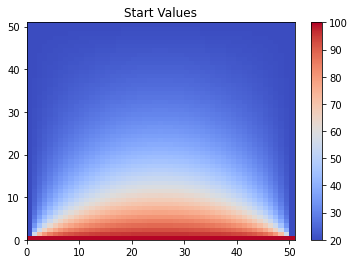

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots()
axs.set_title('Start Values')

c = axs.pcolormesh(T_np1, cmap='coolwarm', vmin=T0, vmax=T_A)
fig.colorbar(c, ax=axs)

In [ ]:
print(T_A)

100


In [ ]:
for q in range(int(5)):
    for s in range(2):
        print(s)
    for r in range(3):
        print(r)

0
1
0
1
2
0
1
0
1
2
0
1
0
1
2
0
1
0
1
2
0
1
0
1
2


In [ ]:
numbers = [2, 3, 4,]

# start parameter is not provided
numbers_sum = sum(numbers)
print(numbers_sum)

9
